In [1]:
#!pip install nltk
import nltk
import pandas as pd
import geopandas as gpd
from IPython.display import Markdown, display
import shapefile
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import pyLDAvis.gensim_models
import numpy as np
#nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import pos_tag
from nltk.classify import NaiveBayesClassifier
import matplotlib.font_manager as fm
import gensim
from gensim import corpora, models
from collections import Counter
import seaborn as sns


#font_path = 'C:\\Users\\paton\\Documents\\_Glasgow Univ MSc\\_yr2_dissertation\\python\\Open_Sans\\OpenSans-VariableFont_wdth,wght.ttf'
#fm.fontManager.addfont(font_path)

C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


## Read in data for Planning Applications with subset option

In [2]:
#read in planning app data
subset_size = 5000  # Specify the size of the random subset you want
planapp_gdf_read = gpd.read_file('D:\\_Glasgow Univ MSc\\_dissertation_data\\other\\Planning_Applications_CCF_PREMIUM_-_Scotland-sh_plnapp_premium pub_plnapppol\\pub_plnapppol.shp')
planapp_gdf = planapp_gdf_read.sample(n=subset_size)


## Read in data for LDPs

In [3]:
#read in LDP data
#planldp_gdf = gpd.read_file('D:\\_Glasgow Univ MSc\\_dissertation_data\\other\\AttributeRemover_3_Output_area.shp')

## Define columns for Description, Application, Status, Proposal and for LDPs for Type and Text of Type

In [4]:
#create columns for later handling
planapp_gdf["text_proposal"] = planapp_gdf["proposal"]
planapp_gdf["text_desc"] = planapp_gdf["dev_desc"]
planapp_gdf["text_app"] = planapp_gdf["appl_desc"]
planapp_gdf["text_status"] = planapp_gdf["stat_desc"]
#planldp_gdf["text_type1"] = planldp_gdf["type"]
#planldp_gdf["text_type2"] = planldp_gdf["text_type1"]


## Text preprocessing function

In [5]:
def text_preprocessing(text):
    if text is None:
        return []  # Return an empty list if text is None
    # Convert words to lower case
    text = text.lower()
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text) 

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]
    
    return text

def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text

# Single version for processing selected columns, singly or in parallel

## 1. Select the column for processing (code into drop down?)

In [6]:
#planapp_gdf["text_desc"] 
#planapp_gdf["text_app"] 
#planapp_gdf["text_status"] 
#planapp_gdf["text_proposal"]

planapp_gdf["feature"] = planapp_gdf["text_desc"]
planapp_gdf["feature_unsplit"] = planapp_gdf["text_desc"]

## 2. Word Clouds
## 3. Apply text preprocessing function to Description

In [7]:
# Create a list of review by applying text_preprocessing function
planapp_gdf["feature"] = list(map(text_preprocessing, planapp_gdf.feature))

# Return to string with to_string function
planapp_gdf['feature_clean'] = list(map(to_string, planapp_gdf["feature"]))

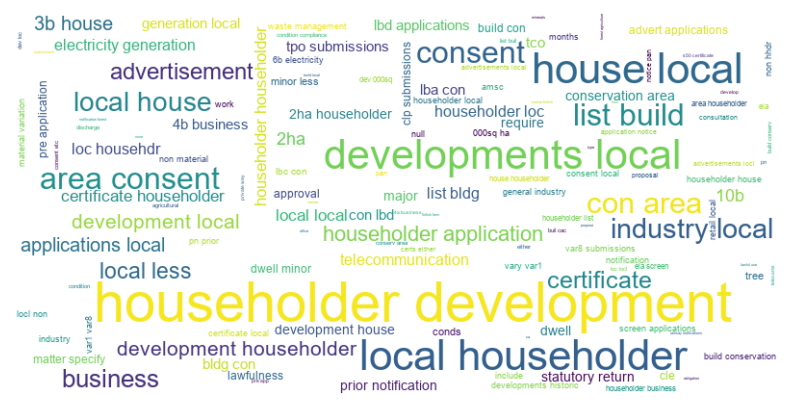

In [8]:
# further word cloud needed for tokenised text
text_app_series = planapp_gdf["feature_clean"]
data = ' '.join(text_app_series.astype(str))
font_path = 'C:\\Windows\\Fonts\\arial.ttf'  # Specify the TrueType font file
wordcloud = WordCloud(font_path=font_path,background_color='white',width=800,height=400).generate(data)
# Display the generated image
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3. Term count and chart of phrases and tokens (selectable count threshold below for "most_frequent")



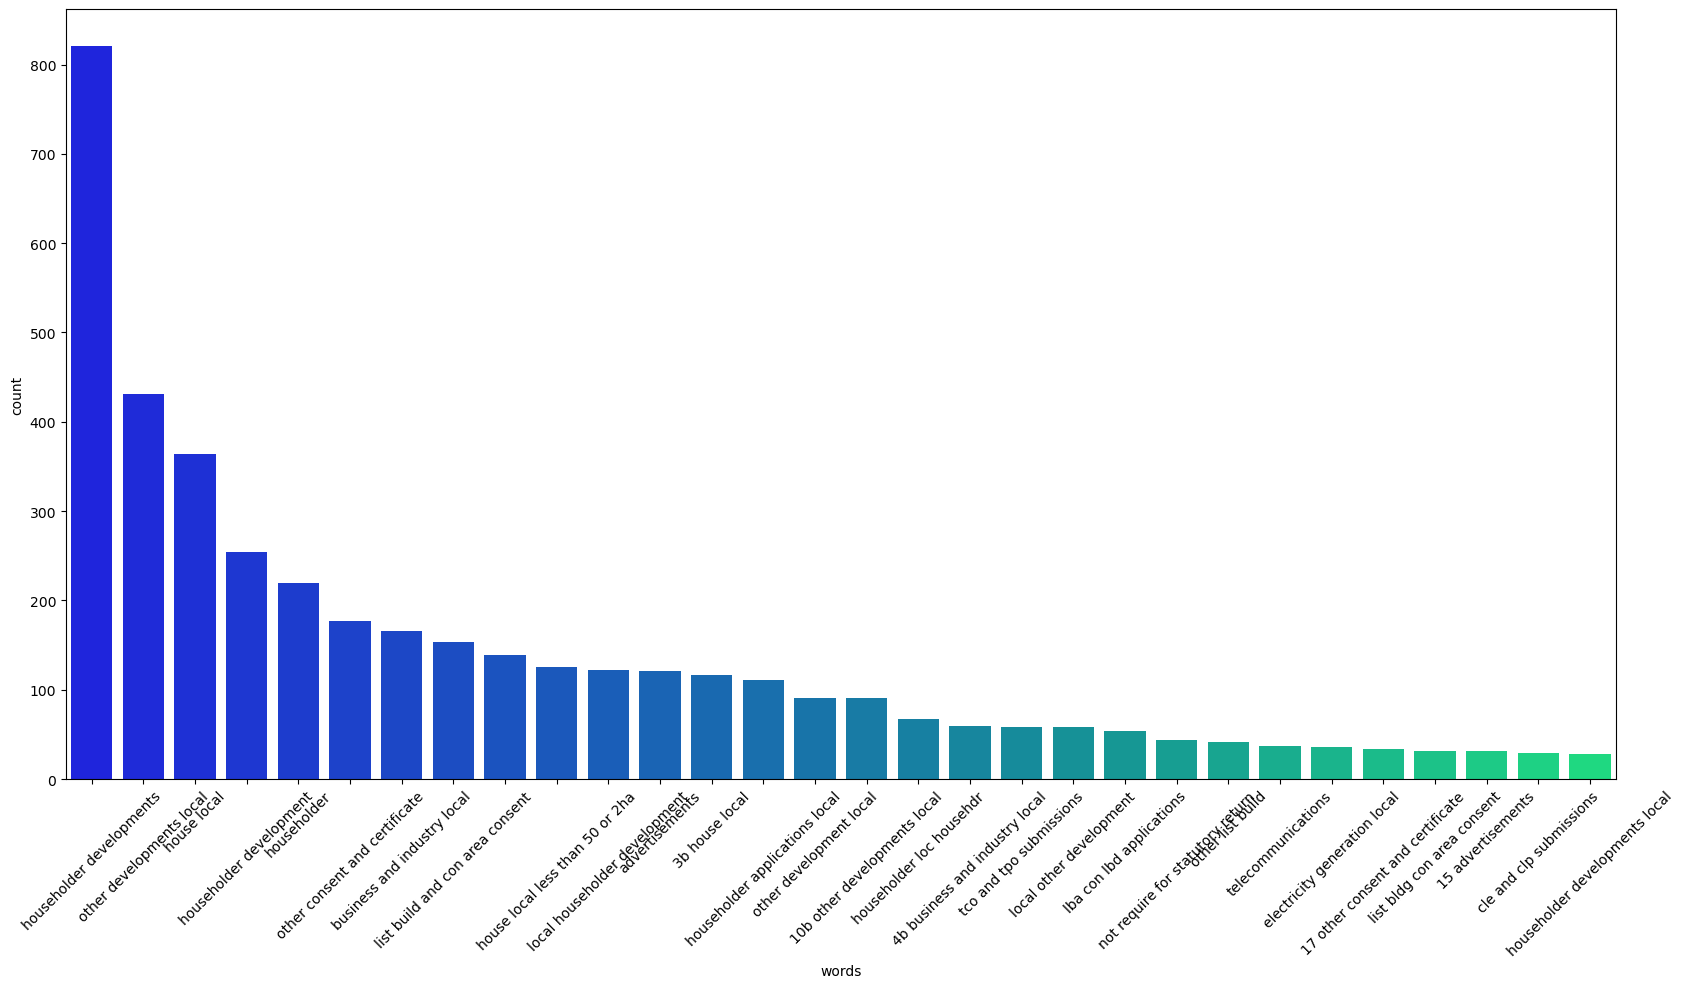

Counter({'householder developments': 821, 'other developments local': 431, 'house local': 364, 'householder development': 254, 'householder': 220, 'other consent and certificate': 177, 'business and industry local': 166, 'list build and con area consent': 154, '': 139, 'house local less than 50 or 2ha': 125, 'local householder development': 122, 'advertisements': 121, '3b house local': 116, 'householder applications local': 111, 'other development local': 91, '10b other developments local': 91, 'householder loc househdr': 67, '4b business and industry local': 60, 'tco and tpo submissions': 58, 'local other development': 58, 'lba con lbd applications': 54, 'not require for statutory return': 44, 'other list build': 42, 'telecommunications': 37, 'electricity generation local': 36, '17 other consent and certificate': 34, 'list bldg con area consent': 32, '15 advertisements': 31, 'cle and clp submissions': 29, 'householder developments local': 28, 'householder application': 27, 'local hous

In [9]:
#phrases
word_counter = Counter(planapp_gdf["feature_clean"])
most_frequent = word_counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize=(20, 10))
_ = pd.DataFrame(most_frequent, columns=("words", "count"))
sns.barplot(x='words', y='count', data=_, palette='winter')
plt.xticks(rotation=45)

plt.show()

print(word_counter)

Counter({'local': 1991, 'householder': 1671, 'developments': 1396, 'other': 1128, 'and': 754, 'house': 675, 'consent': 574, 'development': 554, 'list': 356, 'con': 324, 'area': 316, 'build': 282, 'certificate': 270, 'business': 259, 'industry': 256, 'applications': 205, '50': 170, 'less': 169, 'than': 169, 'advertisements': 167, 'or': 137, '2ha': 131, '3b': 116, 'submissions': 106, '10b': 93, 'loc': 75, 'househdr': 67, 'electricity': 66, 'bldg': 66, 'generation': 65, 'dwell': 63, '4b': 62, 'telecommunications': 62, 'application': 59, 'tco': 58, 'tpo': 58, 'of': 57, 'not': 55, 'notification': 54, 'lba': 54, 'lbd': 54, 'prior': 49, 'major': 46, 'require': 45, 'minor': 45, 'for': 44, 'statutory': 44, 'return': 44, '14': 42, 'conservation': 41, 'all': 35, '17': 34, '15': 31, 'pre': 30, 'non': 29, 'cle': 29, 'clp': 29, 'in': 27, 'advert': 26, 'lawfulness': 25, 'approval': 25, 'matter': 23, 'specify': 23, 'conds': 21, 'tree': 21, 'screen': 19, 'lbc': 18, 'vary': 16, 'var1': 16, 'var8': 16, '

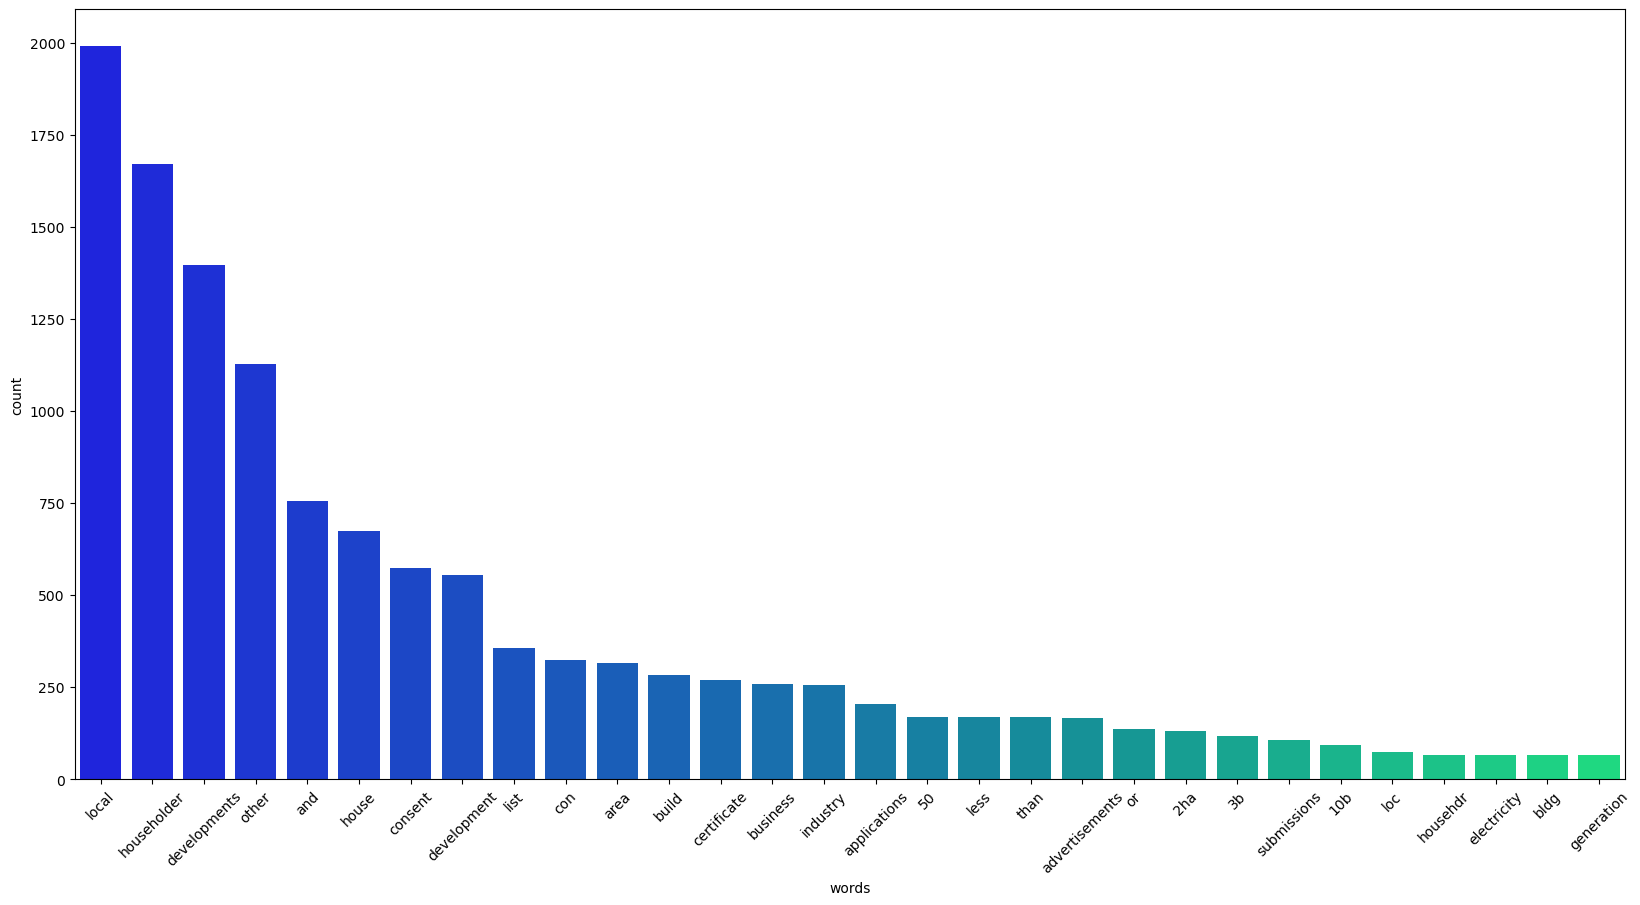

In [10]:
# token words
# Join all word corpus
desc_words = ' '.join(list(planapp_gdf['feature_clean'].values))

# Count and find the 30 most frequent
word_counter = Counter(desc_words.split())
most_frequent = word_counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize=(20, 10))
_ = pd.DataFrame(most_frequent, columns=("words", "count"))
sns.barplot(x='words', y='count', data=_, palette='winter')
plt.xticks(rotation=45)

print(word_counter)

## 4a. Tokenisation and LDM modelling with coherence score plot - Phrases

In [11]:
#desc_list = [desc.split() for desc in planapp_gdf["feature_clean"] if isinstance(desc, str)]
desc_list = [[desc] for desc in planapp_gdf["feature_clean"] if isinstance(desc, str)]


In [12]:
desc_list

[['local householder development'],
 ['list build and con area consent'],
 ['householder applications local'],
 ['other consent and certificate'],
 ['householder developments'],
 ['householder applications local'],
 ['other dev 000sq ha local'],
 ['householder'],
 ['house local'],
 ['list build conservation area'],
 ['list build and con area consent'],
 ['householder application'],
 ['householder developments'],
 ['tco and tpo submissions'],
 ['4b business and industry local'],
 ['17 other consent and certificate'],
 ['other developments local'],
 ['other developments local'],
 ['householder developments'],
 ['house local less than 50 or 2ha'],
 ['other developments local'],
 ['householder developments'],
 ['householder developments'],
 ['business and industry major'],
 ['list build and con area consent'],
 ['householder'],
 [''],
 ['householder developments'],
 ['prior other type'],
 ['householder developments local'],
 [''],
 ['householder developments'],
 ['not require for statutory

In [13]:
# Version for the phrases not the single words

# Filter out non-string values
# Filter out non-string values
desc_list = [[desc] for desc in planapp_gdf["feature_clean"] if isinstance(desc, str)]

# Create Dictionary
id2word = gensim.corpora.Dictionary(desc_list)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in desc_list]

from gensim.models import CoherenceModel, LdaMulticore

# Compute coherence score
number_of_topics = []
coherence_score = []

for i in range(1, 5): #change back to 20
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=id2word,
                             iterations=5,
                             num_topics=i,
                             workers=8)
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=desc_list,
                                         dictionary=id2word,
                                         coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    number_of_topics.append(i)
    coherence_score.append(coherence_lda)

    # Print coherence score for each iteration
    print(f"Iteration {i}: Coherence Score = {coherence_lda}")


Iteration 1: Coherence Score = -24.466284520063727
Iteration 2: Coherence Score = -24.43970091175881
Iteration 3: Coherence Score = -24.34169397845895
Iteration 4: Coherence Score = -24.195861659034545


In [14]:
desc_list

[['local householder development'],
 ['list build and con area consent'],
 ['householder applications local'],
 ['other consent and certificate'],
 ['householder developments'],
 ['householder applications local'],
 ['other dev 000sq ha local'],
 ['householder'],
 ['house local'],
 ['list build conservation area'],
 ['list build and con area consent'],
 ['householder application'],
 ['householder developments'],
 ['tco and tpo submissions'],
 ['4b business and industry local'],
 ['17 other consent and certificate'],
 ['other developments local'],
 ['other developments local'],
 ['householder developments'],
 ['house local less than 50 or 2ha'],
 ['other developments local'],
 ['householder developments'],
 ['householder developments'],
 ['business and industry major'],
 ['list build and con area consent'],
 ['householder'],
 [''],
 ['householder developments'],
 ['prior other type'],
 ['householder developments local'],
 [''],
 ['householder developments'],
 ['not require for statutory

   ## Coherence lineplot of phrases

<AxesSubplot:xlabel='number_of_topics', ylabel='coherence_score'>

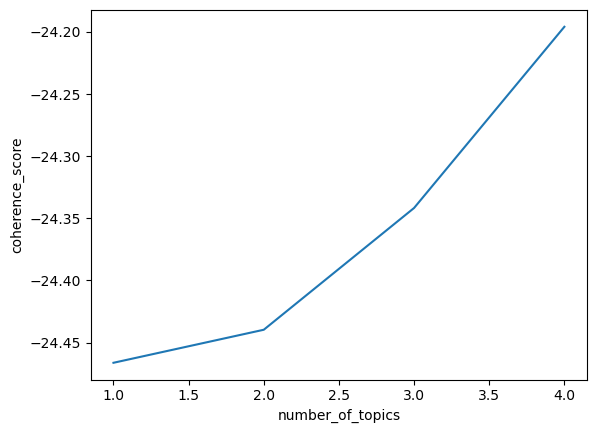

In [15]:
topic_coherence = pd.DataFrame({'number_of_topics': number_of_topics,
                                'coherence_score': coherence_score})
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [16]:
# Define the number of topics 
n_topics = 17

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [17]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.005*"other developments local" + 0.005*"householder development" + 0.005*"3b house local" + 0.005*"other development local" + 0.005*"advertisements" + 0.005*"" + 0.005*"local other development" + 0.005*"householder loc househdr" + 0.005*"house local less than 50 or 2ha" + 0.005*"business and industry local"
Topic: 1 Word: 0.638*"householder" + 0.326*"list build and con area consent" + 0.000*"householder development" + 0.000*"other developments local" + 0.000*"4b business and industry local" + 0.000*"advertisements" + 0.000*"householder loc househdr" + 0.000*"business and industry local" + 0.000*"" + 0.000*"house local less than 50 or 2ha"
Topic: 2 Word: 0.852*"local householder development" + 0.001*"other developments local" + 0.001*"householder development" + 0.001*"other development local" + 0.001*"other certificate of lawfulness" + 0.001*"telecommunications" + 0.001*"householder loc househdr" + 0.001*"business and industry local" + 0.001*"3b house local" + 0.001*"ad

## Visualisation of phrases by topic

In [18]:
pyLDAvis.enable_notebook()

# Prepare the visualization data
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)

# Convert topic_info to a DataFrame
topic_info_df = pd.DataFrame(vis_data.topic_info)

# Convert token_table to a DataFrame
token_table_df = pd.DataFrame(vis_data.token_table)

# Convert topic_coordinates to a DataFrame and replace complex numbers with real values
topic_coords_df = pd.DataFrame(vis_data.topic_coordinates.applymap(np.real))

# Convert any remaining NaN values to 0
topic_coords_df = topic_coords_df.fillna(0)

# Create a new PreparedData object with the updated data
updated_data = pyLDAvis.PreparedData(topic_coordinates=topic_coords_df,
                                    topic_info=topic_info_df,
                                    token_table=token_table_df,
                                    R=vis_data.R,
                                    lambda_step=vis_data.lambda_step,
                                    plot_opts=vis_data.plot_opts,
                                    topic_order=vis_data.topic_order)

# Display the visualization
pyLDAvis.display(updated_data)


## 4b. Tokenisation of phrases to create words 

In [19]:
# Tokenize the documents
tokenized_docs = [word_tokenize(doc) for doc in planapp_gdf["feature_clean"].tolist()]

# Create Dictionary
id2word = gensim.corpora.Dictionary(tokenized_docs)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in tokenized_docs]

from gensim.models import CoherenceModel, LdaMulticore

# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1, 20):
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=id2word,
                             iterations=5,
                             num_topics=i,
                             workers=8)
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=tokenized_docs,
                                         dictionary=id2word,
                                         coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    number_of_topics.append(i)
    coherence_score.append(coherence_lda)

    # Print coherence score for each iteration
    print(f"Iteration {i}: Coherence Score = {coherence_lda}")


Iteration 1: Coherence Score = -18.971279755779715
Iteration 2: Coherence Score = -18.894667888350185
Iteration 3: Coherence Score = -18.823485452683496
Iteration 4: Coherence Score = -18.736080049824775
Iteration 5: Coherence Score = -18.452217477570976
Iteration 6: Coherence Score = -18.640741303300917
Iteration 7: Coherence Score = -18.64738736772713
Iteration 8: Coherence Score = -18.768443236826
Iteration 9: Coherence Score = -18.79405790629066
Iteration 10: Coherence Score = -18.774417611292144
Iteration 11: Coherence Score = -18.876431121433065
Iteration 12: Coherence Score = -18.589484641095723
Iteration 13: Coherence Score = -18.83992092843298
Iteration 14: Coherence Score = -18.54490894629913
Iteration 15: Coherence Score = -18.779449919897594
Iteration 16: Coherence Score = -18.673956263898855
Iteration 17: Coherence Score = -18.797712630172185
Iteration 18: Coherence Score = -18.797780964803337
Iteration 19: Coherence Score = -18.690045713180066


<AxesSubplot:xlabel='number_of_topics', ylabel='coherence_score'>

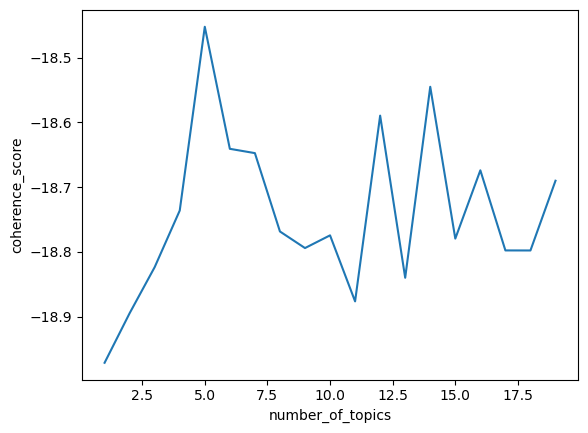

In [20]:
topic_coherence = pd.DataFrame({'number_of_topics': number_of_topics,
                                'coherence_score': coherence_score})
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [21]:
corpus 

[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(1, 1), (2, 1), (9, 1)],
 [(3, 1), (7, 1), (10, 1), (11, 1)],
 [(1, 1), (12, 1)],
 [(1, 1), (2, 1), (9, 1)],
 [(2, 1), (11, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1)],
 [(2, 1), (16, 1)],
 [(4, 1), (5, 1), (8, 1), (17, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(1, 1), (18, 1)],
 [(1, 1), (12, 1)],
 [(3, 1), (19, 1), (20, 1), (21, 1)],
 [(2, 1), (3, 1), (22, 1), (23, 1), (24, 1)],
 [(3, 1), (7, 1), (10, 1), (11, 1), (25, 1)],
 [(2, 1), (11, 1), (12, 1)],
 [(2, 1), (11, 1), (12, 1)],
 [(1, 1), (12, 1)],
 [(2, 1), (16, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(2, 1), (11, 1), (12, 1)],
 [(1, 1), (12, 1)],
 [(1, 1), (12, 1)],
 [(3, 1), (23, 1), (24, 1), (31, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(1, 1)],
 [],
 [(1, 1), (12, 1)],
 [(11, 1), (32, 1), (33, 1)],
 [(1, 1), (2, 1), (12, 1)],
 [],
 [(1, 1), (12, 1)],
 [(34, 1), (35, 1), (36, 1), (37, 1), (38, 1)],
 [(2, 1)

   ### Modelling of words running with defined number of topics

In [22]:
# Define the number of topics 
n_topics = 17

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [23]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.005*"advertisements" + 0.005*"telecommunications" + 0.005*"15" + 0.005*"not" + 0.005*"pre" + 0.005*"prior" + 0.005*"application" + 0.005*"require" + 0.005*"return" + 0.005*"statutory"
Topic: 1 Word: 0.005*"advertisements" + 0.005*"telecommunications" + 0.005*"15" + 0.005*"not" + 0.005*"pre" + 0.005*"prior" + 0.005*"application" + 0.005*"require" + 0.005*"return" + 0.005*"statutory"
Topic: 2 Word: 0.479*"householder" + 0.381*"development" + 0.066*"loc" + 0.066*"househdr" + 0.000*"application" + 0.000*"material" + 0.000*"variation" + 0.000*"all" + 0.000*"busi" + 0.000*"ind"
Topic: 3 Word: 0.295*"local" + 0.252*"house" + 0.062*"3b" + 0.053*"50" + 0.053*"than" + 0.053*"less" + 0.037*"electricity" + 0.036*"generation" + 0.036*"or" + 0.036*"2ha"
Topic: 4 Word: 0.781*"local" + 0.128*"applications" + 0.037*"lbd" + 0.037*"lba" + 0.008*"advert" + 0.000*"000sq" + 0.000*"ha" + 0.000*"dev" + 0.000*"telecommunications" + 0.000*"management"
Topic: 5 Word: 0.005*"advertisements" + 0.0

## 7. Visualisation using pyLDAvis

In [24]:
import pyLDAvis.gensim_models
import numpy as np
import pandas as pd

# Enable notebook display
pyLDAvis.enable_notebook()

# Prepare the visualization data
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)

# Convert topic_info to a DataFrame
topic_info_df = pd.DataFrame(vis_data.topic_info)

# Convert token_table to a DataFrame
token_table_df = pd.DataFrame(vis_data.token_table)

# Convert topic_coordinates to a DataFrame and replace complex numbers with real values
topic_coords_df = pd.DataFrame(vis_data.topic_coordinates.applymap(np.real))

# Convert any remaining NaN values to 0
topic_coords_df = topic_coords_df.fillna(0)

# Create a new PreparedData object with the updated data
updated_data = pyLDAvis.PreparedData(topic_coordinates=topic_coords_df,
                                    topic_info=topic_info_df,
                                    token_table=token_table_df,
                                    R=vis_data.R,
                                    lambda_step=vis_data.lambda_step,
                                    plot_opts=vis_data.plot_opts,
                                    topic_order=vis_data.topic_order)

# Display the visualization
pyLDAvis.display(updated_data)


In [ ]:
#!pip install top2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from top2vec import Top2Vec


In [ ]:
tagged_documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(planapp_gdf["feature_clean"])]
